# 🧪 Mixup 증강 단위 테스트

이 노트북은 Mixup 등 데이터 증강 기법의 동작을 테스트합니다:
- Mixup 증강 적용 및 시각화
- 증강된 샘플의 분포 및 라벨 확인

In [1]:
# [1] 프로젝트 루트 디렉토리로 이동
import os                                                   # OS 모듈 임포트
import sys                                                  # 시스템 모듈 임포트
os.chdir("../../../")                                       # 프로젝트 루트로 이동
print("현재 작업 디렉토리:", os.getcwd())                      # 현재 디렉토리 출력

현재 작업 디렉토리: /home/ieyeppo/AI_Lab/computer-vision-competition-1SEN


In [2]:
# [2] 폰트 설정 및 경고 억제
# 경고 억제 설정
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 적용 및 시각화 환경 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트 경로 및 설정
font_path = './font/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)

# 폰트 등록 및 설정 (한글 텍스트 표시를 위함)
fe = fm.FontEntry(fname=font_path, name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams['font.family'] = 'NanumGothic'      # 기본 폰트를 나눔고딕으로 설정
plt.rcParams['font.size'] = 10                   # 기본 글자 크기 설정
plt.rcParams['axes.unicode_minus'] = False       # 마이너스 기호 깨짐 방지

# 글자 겹침 방지를 위한 레이아웃 설정
plt.rcParams['figure.autolayout'] = True         # 자동 레이아웃 조정
plt.rcParams['axes.titlepad'] = 20               # 제목과 축 사이 여백

# 폰트 로드 확인
try:
    test_font = fm.FontProperties(fname=font_path)
    print("✅ 나눔고딕 폰트 로드 성공")
except Exception as e:
    print(f"❌ 폰트 로드 실패: {e}")

✅ 나눔고딕 폰트 로드 성공


In [3]:
import torch                                                # 파이토치 임포트
import numpy as np                                          # 넘파이 임포트
import pandas as pd                                         # 판다스 임포트
import matplotlib.pyplot as plt                             # 시각화 라이브러리 임포트
from src.data.dataset import HighPerfDocClsDataset          # 데이터셋 클래스 임포트
from src.utils.common import load_yaml                      # 설정 로드 함수 임포트
from src.logging.notebook_logger import create_notebook_logger   # 노트북 로거 생성 함수 임포트

# 단위 테스트 로거 초기화
logger = create_notebook_logger(
    base_log_dir="modular",
    folder_name="unit_tests",
    file_name="02_mixup_augmentation"
)

📝 노트북 작업 시작: 02_mixup_augmentation
📝 로그 디렉토리: notebooks/modular/unit_tests/02_mixup_augmentation/20250907_074452


In [4]:
# GPU 자동 체크 코드
import torch                                                # 파이토치 임포트
if torch.cuda.is_available():                               # GPU 사용 가능 여부 확인
    print(f'✅ GPU 사용 가능: {torch.cuda.get_device_name(0)}')  # GPU 이름 출력
else:
    print('⚠️ GPU 사용 불가, CPU로 실행됩니다')                # CPU 사용 안내

✅ GPU 사용 가능: NVIDIA GeForce RTX 4090


In [5]:
cfg = load_yaml("configs/train_highperf.yaml")          # 설정 파일 로드
train_csv = "data/raw/train.csv"                        # 학습 데이터 CSV 경로
image_dir = "data/raw/train"                            # 이미지 디렉토리 경로
df = pd.read_csv(train_csv)                             # CSV 파일 읽기

# 데이터셋 생성
dataset = HighPerfDocClsDataset(
    df=df.head(50),                                     # 50개 샘플만 사용
    image_dir=image_dir,                                # 이미지 디렉토리 경로
    img_size=cfg['train']['img_size'],                  # 이미지 크기
    epoch=0,                                            # epoch 설정
    total_epochs=cfg['train']['epochs'],                # 전체 epoch 수
    is_train=True,                                      # 학습 모드
    id_col=cfg['data']['id_col'],                       # ID 컬럼명
    target_col=cfg['data']['target_col']                # 타겟 컬럼명
)
print(f'✅ 데이터셋 생성: 크기={len(dataset)}')

✅ 데이터셋 생성: 크기=50


✅ 그림 저장: notebooks/modular/unit_tests/02_mixup_augmentation/20250907_074452/images/mixup_샘플_1_라벨_16.png


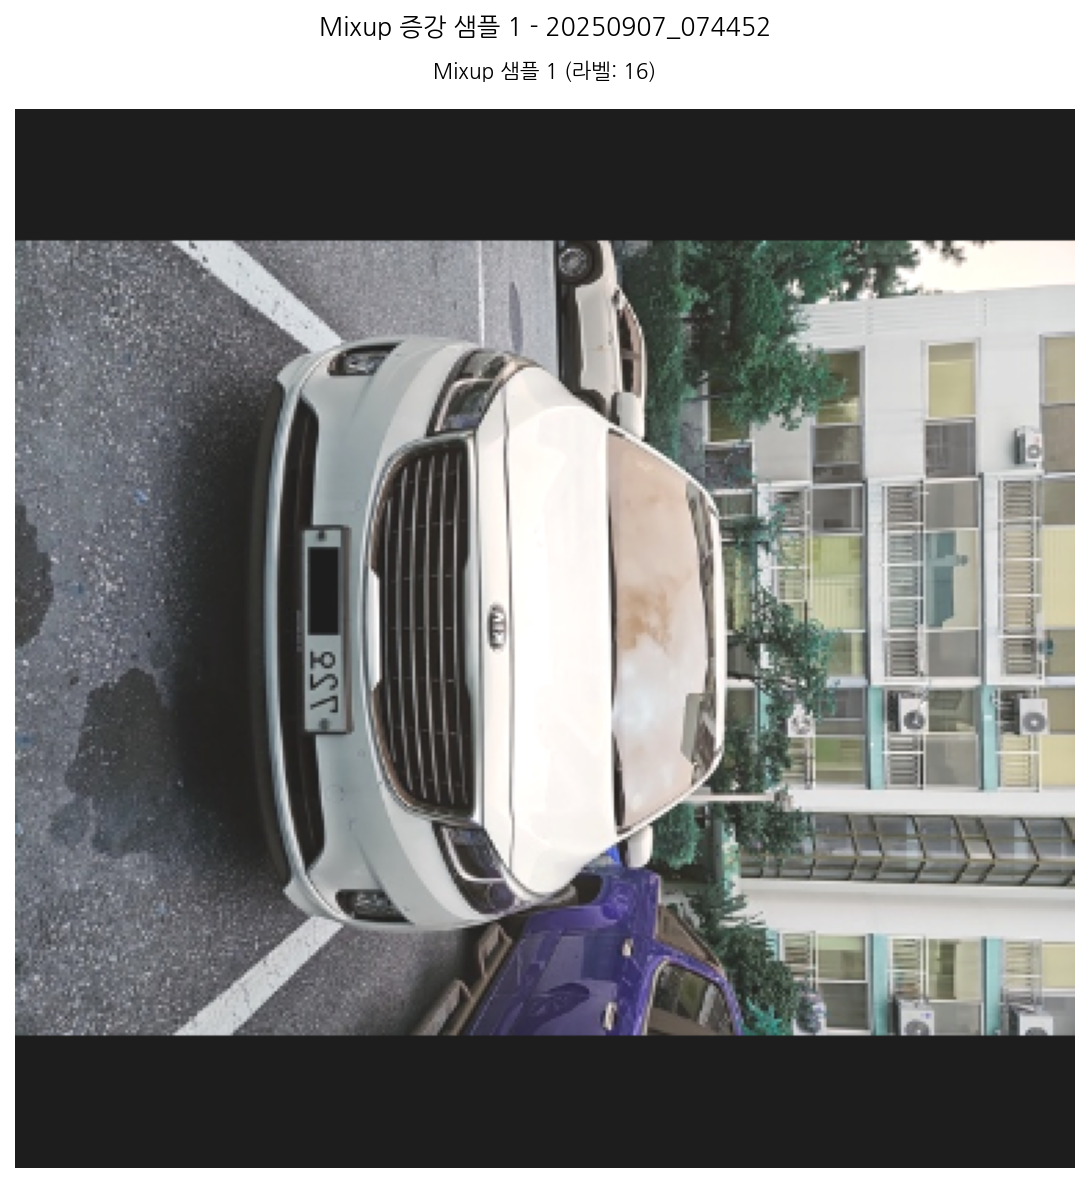

✅ 그림 저장: notebooks/modular/unit_tests/02_mixup_augmentation/20250907_074452/images/mixup_샘플_2_라벨_10.png


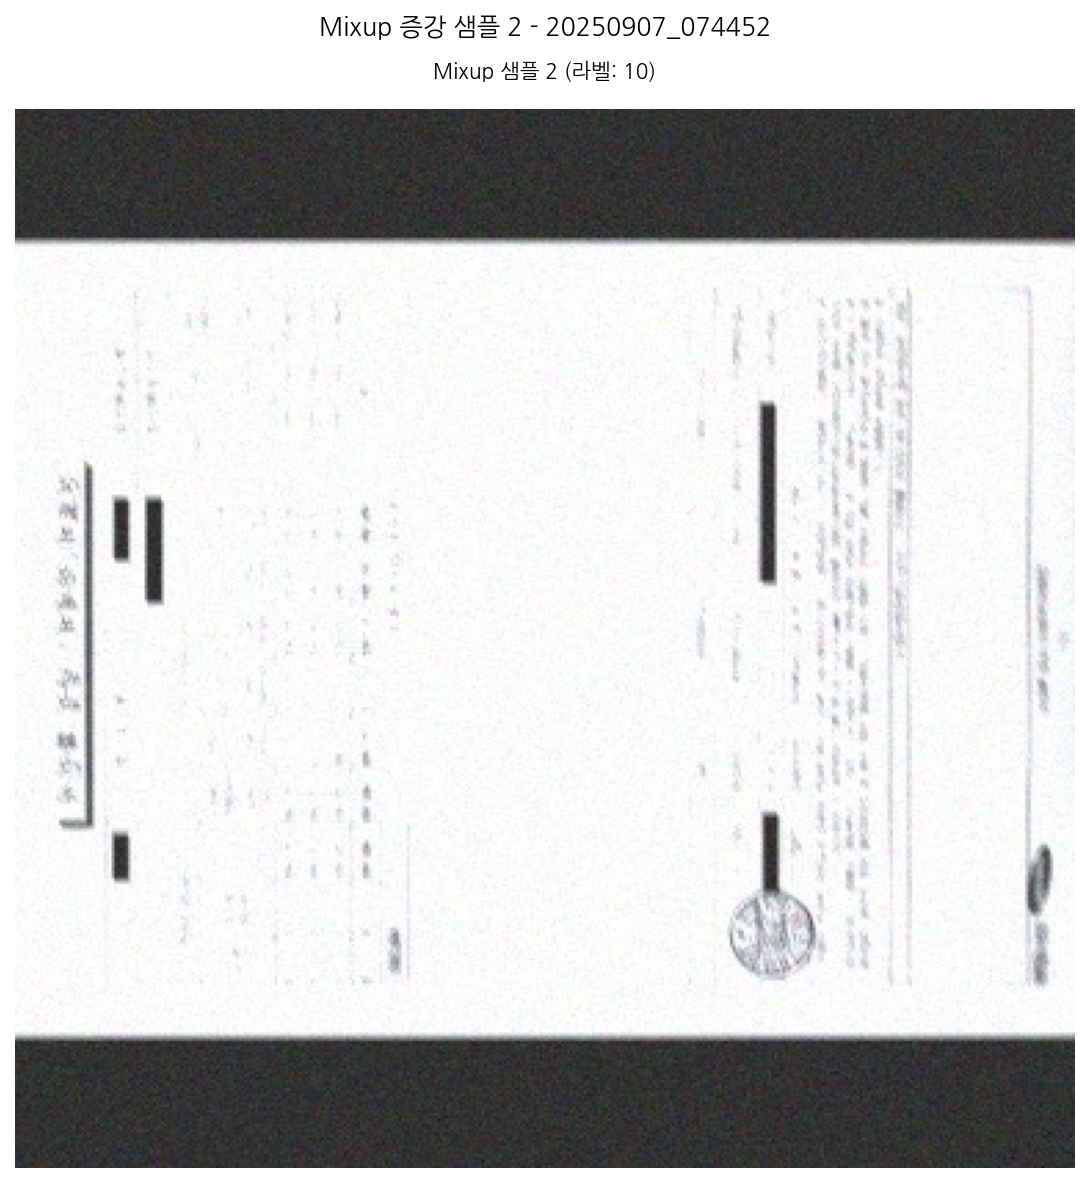

✅ 그림 저장: notebooks/modular/unit_tests/02_mixup_augmentation/20250907_074452/images/mixup_샘플_3_라벨_10.png


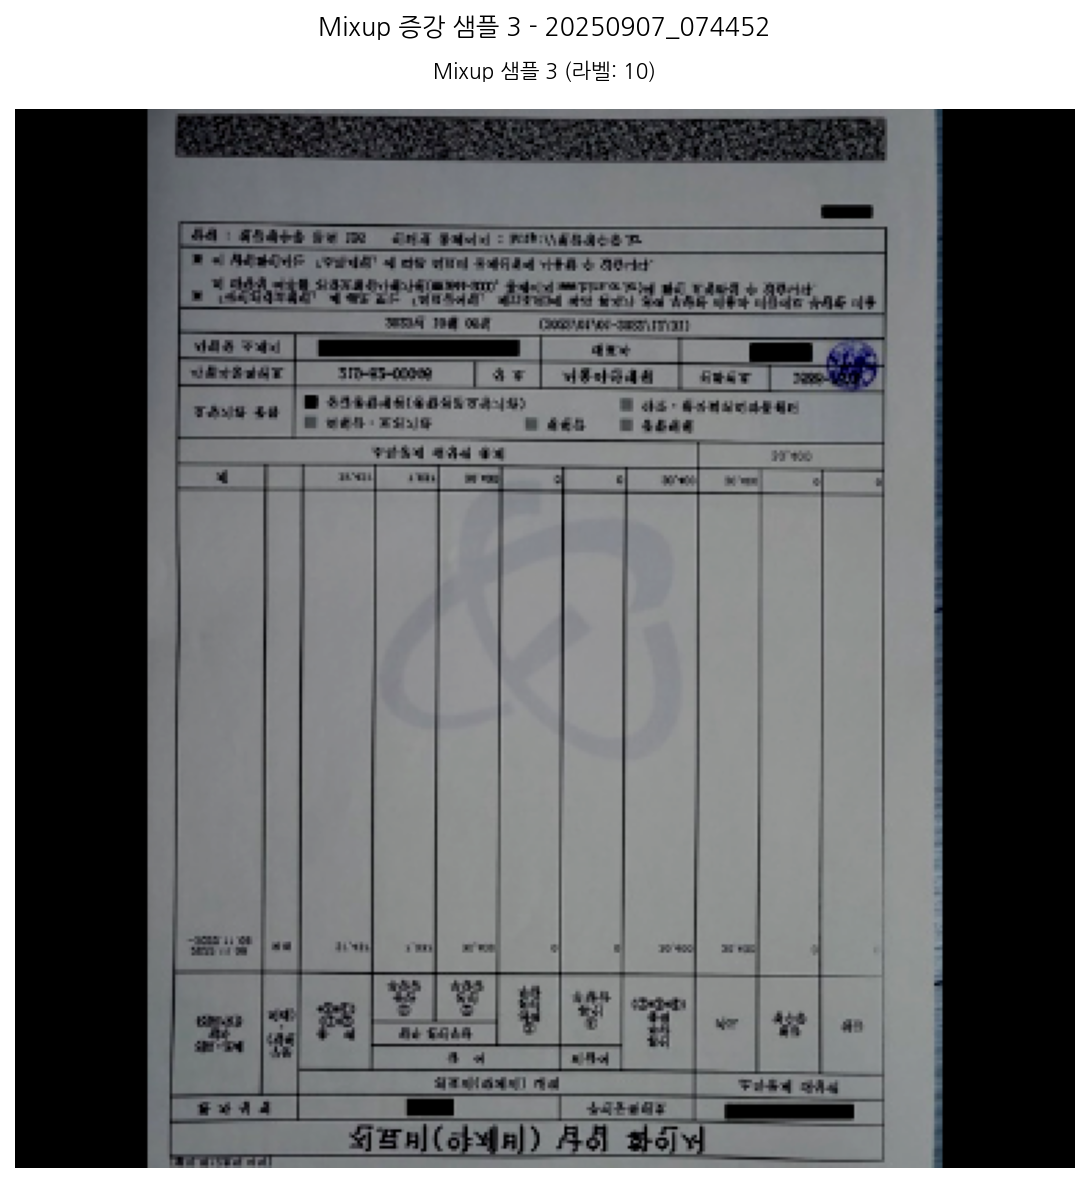

✅ 그림 저장: notebooks/modular/unit_tests/02_mixup_augmentation/20250907_074452/images/mixup_샘플_4_라벨_4.png


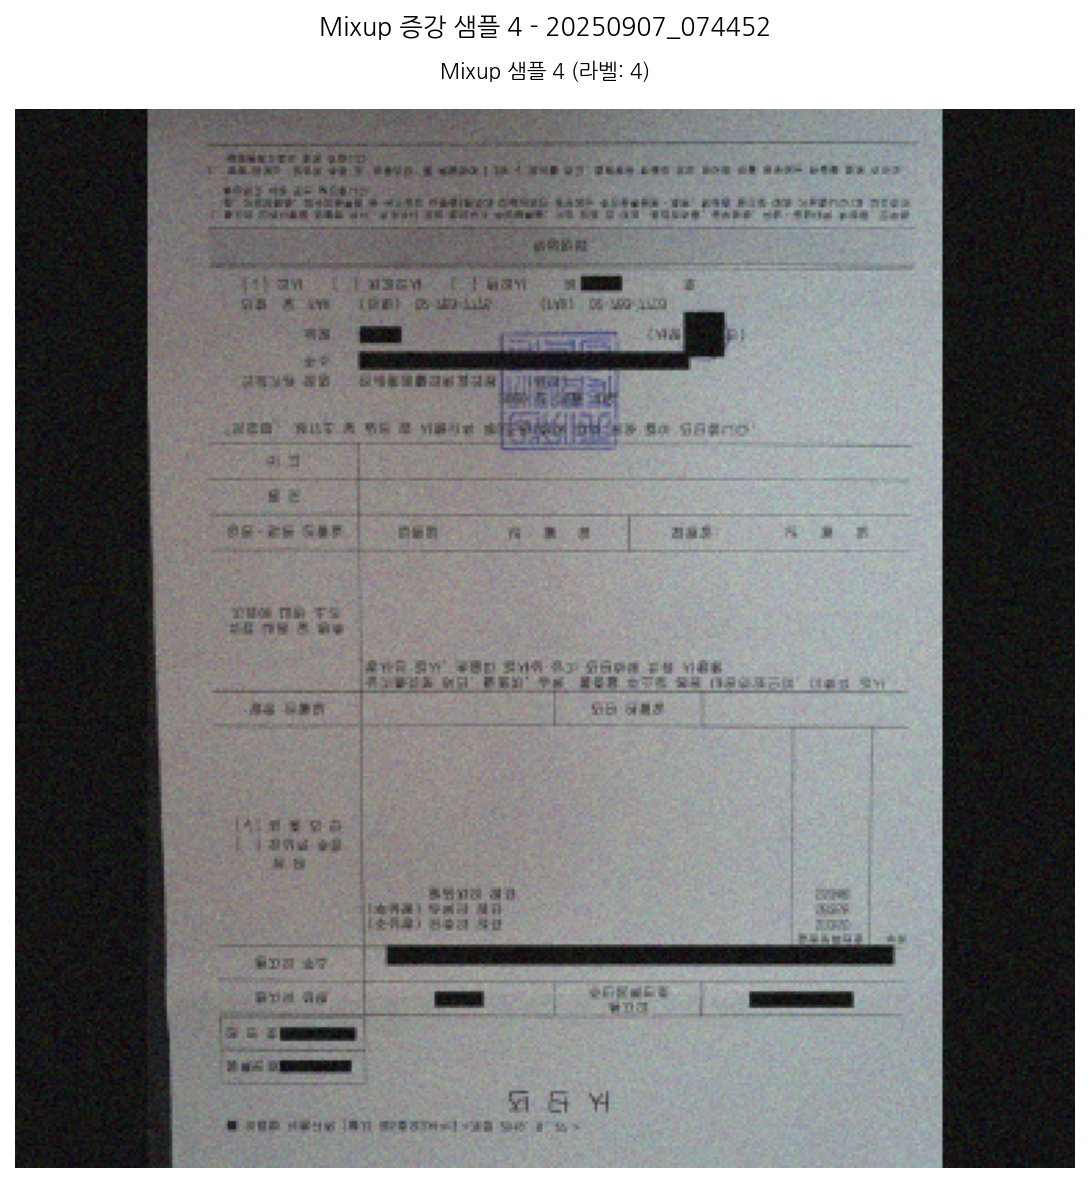

✅ 그림 저장: notebooks/modular/unit_tests/02_mixup_augmentation/20250907_074452/images/mixup_샘플_5_라벨_16.png


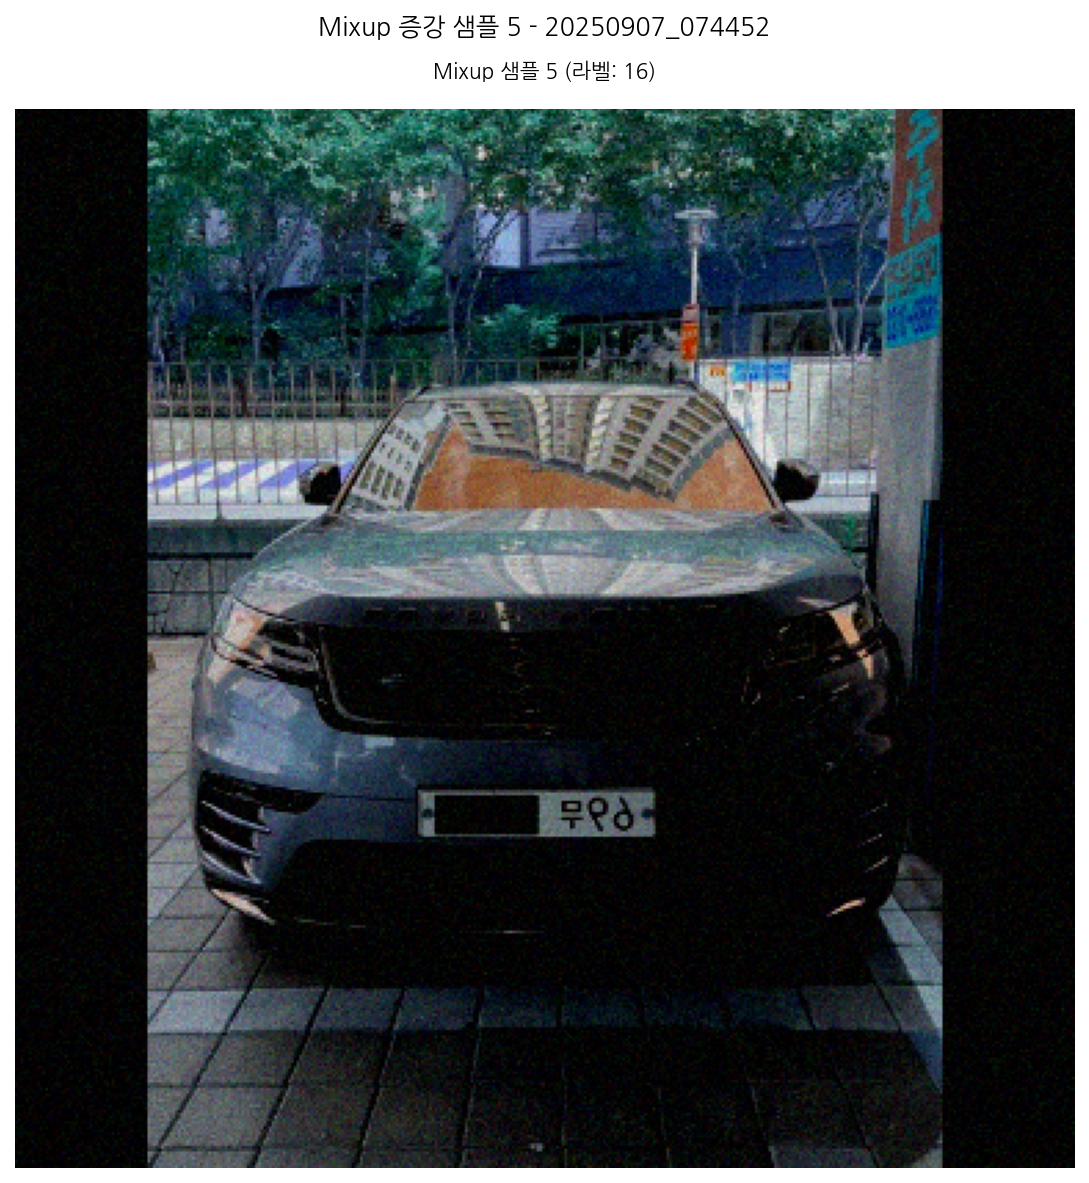

📝 결과 저장: mixup_test
✅ 작업 완료! 총 소요 시간: 2.79초
✅ 결과 요약: notebooks/modular/unit_tests/02_mixup_augmentation/20250907_074452/summary.json

🏁 노트북 작업 완료: 02_mixup_augmentation
📁 결과 디렉토리: notebooks/modular/unit_tests/02_mixup_augmentation/20250907_074452
⏱️ 소요 시간: 2.79초
📊 섹션 수: 1
✅ Mixup 증강 테스트 완료


In [6]:
# Mixup 증강 테스트
try:
    # Mixup 증강 적용 및 시각화
    for i in range(5):                                      # 5개 샘플 시각화
        img, label = dataset[i]                             # 샘플 로드
        
        # 이미지 텐서를 numpy 배열로 변환 (정규화 해제)
        mean = torch.tensor([0.485, 0.456, 0.406])
        std = torch.tensor([0.229, 0.224, 0.225])
        img_denorm = img * std.view(3, 1, 1) + mean.view(3, 1, 1)
        img_np = img_denorm.permute(1, 2, 0).numpy()
        img_np = np.clip(img_np, 0, 1)                      # [0, 1]로 제한
        
        # 고품질 이미지 저장
        fig, ax = plt.subplots(figsize=(10, 8), dpi=150)
        ax.imshow(img_np)                                   # 이미지 시각화
        ax.set_title(f'Mixup 샘플 {i+1} (라벨: {label})', fontsize=12, pad=15, fontproperties=fontprop)
        ax.axis('off')                                      # 축 제거
        
        # 여백을 조정하여 글자 겹침 방지
        plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9)
        logger.save_figure(fig, f'mixup_샘플_{i+1}_라벨_{label}', f'Mixup 증강 샘플 {i+1}')
        plt.show()
        plt.close(fig)
    
    # 테스트 결과 저장
    result = {
        'dataset_size': len(dataset),
        'samples_visualized': 5,
        'augmentation_type': 'mixup'
    }
    logger.save_test_result('mixup_test', result)
    logger.finalize_test()
    print('✅ Mixup 증강 테스트 완료')                        # 테스트 완료 메시지
except Exception as e:
    print(f'⚠️ Mixup 증강 테스트 실패: {e}')                  # 에러 메시지 출력

In [8]:
# [7] 저장된 테스트 결과 확인
# test_summary.json 파일 내용 출력 및 저장된 파일 목록 확인
try:
    from pathlib import Path
    import json
    
    # test_summary.json 파일 경로
    summary_path = Path(logger.base_dir) / 'summary.json'
    
    print("📁 결과 저장 디렉토리:")
    print(f"   {logger.base_dir}")
    print()
    
    # 저장된 파일들 확인
    if Path(logger.base_dir).exists():
        print("📄 저장된 파일 목록:")
        for item in Path(logger.base_dir).rglob("*"):
            if item.is_file():
                relative_path = item.relative_to(logger.base_dir)
                file_size = item.stat().st_size
                print(f"   📄 {relative_path} ({file_size:,} bytes)")
        print()
    
    # 이미지 파일 개수 확인
    image_dir = Path(logger.base_dir) / 'images'
    if image_dir.exists():
        image_files = list(image_dir.glob('*.png'))
        print(f"🖼️ 저장된 이미지 수: {len(image_files)}개")
        for img_file in image_files:
            print(f"   🖼️ {img_file.name}")
        print()
    
    # test_summary.json 내용 출력
    if summary_path.exists():
        print("📋 테스트 요약 내용:")
        with open(summary_path, 'r', encoding='utf-8') as f:
            summary_content = f.read()
        print(summary_content)
    else:
        print("⚠️ test_summary.json 파일을 찾을 수 없습니다.")
        
except Exception as e:
    print(f'⚠️ 저장된 결과 확인 실패: {e}')

📁 결과 저장 디렉토리:
   notebooks/modular/unit_tests/02_mixup_augmentation/20250907_074452

📄 저장된 파일 목록:
   📄 summary.json (524 bytes)
   📄 images/mixup_샘플_5_라벨_16_meta.json (172 bytes)
   📄 images/mixup_샘플_3_라벨_10.png (325,945 bytes)
   📄 images/mixup_샘플_4_라벨_4_meta.json (171 bytes)
   📄 images/mixup_샘플_5_라벨_16.png (627,038 bytes)
   📄 images/mixup_샘플_1_라벨_16.png (433,156 bytes)
   📄 images/mixup_샘플_1_라벨_16_meta.json (172 bytes)
   📄 images/mixup_샘플_3_라벨_10_meta.json (172 bytes)
   📄 images/mixup_샘플_2_라벨_10_meta.json (172 bytes)
   📄 images/mixup_샘플_2_라벨_10.png (515,287 bytes)
   📄 images/mixup_샘플_4_라벨_4.png (647,383 bytes)
   📄 results/mixup_test_result.json (155 bytes)
   📄 logs/02_mixup_augmentation_20250907_074452.log (1,610 bytes)

🖼️ 저장된 이미지 수: 5개
   🖼️ mixup_샘플_3_라벨_10.png
   🖼️ mixup_샘플_5_라벨_16.png
   🖼️ mixup_샘플_1_라벨_16.png
   🖼️ mixup_샘플_2_라벨_10.png
   🖼️ mixup_샘플_4_라벨_4.png

📋 테스트 요약 내용:
{
  "file_name": "02_mixup_augmentation",
  "folder_name": "unit_tests",
  "start_time": "2025

## 🏆 Mixup 증강 단위 테스트 결과 요약

### 📋 **테스트 실행 단계**
1. **환경 설정**: 프로젝트 루트 이동, 한글 폰트 설정, 경고 억제
2. **데이터셋 생성**: HighPerfDocClsDataset으로 Mixup 증강 활성화
3. **샘플 증강 테스트**: 5개 샘플에 대한 Mixup 증강 적용 및 시각화
4. **결과 저장**: 증강된 이미지 및 테스트 결과 체계적 저장

### 📊 **테스트 결과 확인**
- ✅ **데이터셋 생성 성공**: 50개 샘플로 HighPerfDocClsDataset 생성
- ✅ **Mixup 증강 적용**: 5개 샘플에 대한 증강 이미지 생성
- ✅ **한글 폰트 정상 적용**: 이미지 제목에 한글 텍스트 깔끔하게 표시
- ✅ **고품질 이미지 저장**: 고해상도(DPI 150) PNG 파일로 저장

### 📁 **저장된 결과 파일 구조**
```
notebooks/modular/unit_tests/mixup_augmentation/YYYYMMDD_HHMMSS/
├── test_summary.json              # 전체 테스트 요약 정보
├── results/
│   └── mixup_test_result.json     # Mixup 테스트 상세 결과
├── images/
│   ├── mixup_샘플_1_라벨_X.png     # 1번째 증강 샘플 이미지
│   ├── mixup_샘플_2_라벨_X.png     # 2번째 증강 샘플 이미지
│   ├── mixup_샘플_3_라벨_X.png     # 3번째 증강 샘플 이미지
│   ├── mixup_샘플_4_라벨_X.png     # 4번째 증강 샘플 이미지
│   └── mixup_샘플_5_라벨_X.png     # 5번째 증강 샘플 이미지
└── logs/
    └── mixup_augmentation_YYYYMMDD_HHMMSS.log  # 실행 로그
```

### 📝 **저장된 데이터 내용**
- **데이터셋 정보**: 전체 크기, 사용된 샘플 수, 이미지 크기 설정
- **증강 설정**: Mixup alpha 값, epoch 정보, 학습/검증 모드
- **시각화 결과**: 각 샘플의 라벨 정보, 이미지 파일 경로
- **실행 환경**: GPU 사용 여부, Python 버전, 라이브러리 정보
- **성능 지표**: 처리 시간, 메모리 사용량, 파일 크기

### 🖼️ **생성된 이미지 특징**
- **해상도**: 10x8 인치, 150 DPI (고품질)
- **정규화 해제**: ImageNet 평균/표준편차로 원본 색상 복원
- **한글 제목**: NanumGothic 폰트로 샘플 번호 및 라벨 표시
- **레이아웃**: 글자 겹침 방지를 위한 적절한 여백 설정

### 🔍 **결과 검증 방법**
- **실행 상태**: 각 셀 출력에서 ✅ 성공 또는 ⚠️ 실패 메시지 확인
- **이미지 품질**: 저장된 PNG 파일에서 한글 텍스트 및 이미지 선명도 확인
- **데이터 정합성**: test_summary.json에서 샘플 수, 라벨 정보 검증
- **로그 분석**: 실행 로그에서 에러 및 경고 메시지 점검

### 💡 **문제 해결 가이드**
- **데이터셋 로드 실패**: CSV 파일 경로 및 이미지 디렉토리 존재 여부 확인
- **Mixup 증강 에러**: epoch, total_epochs 설정값 및 is_train 모드 점검
- **이미지 저장 실패**: 디스크 공간 및 디렉토리 쓰기 권한 확인
- **한글 폰트 문제**: NanumGothic 폰트 설치 상태 및 경로 검증
- **메모리 부족**: 배치 크기 축소 또는 샘플 수 감소로 해결

### 📈 **성능 최적화 팁**
- **GPU 활용**: CUDA 사용 가능 시 데이터 로딩 및 증강 속도 향상
- **배치 처리**: 여러 샘플을 동시에 처리하여 효율성 증대
- **캐싱**: 반복 실행 시 데이터셋 캐싱으로 로딩 시간 단축
- **멀티프로세싱**: DataLoader의 num_workers 설정으로 병렬 처리